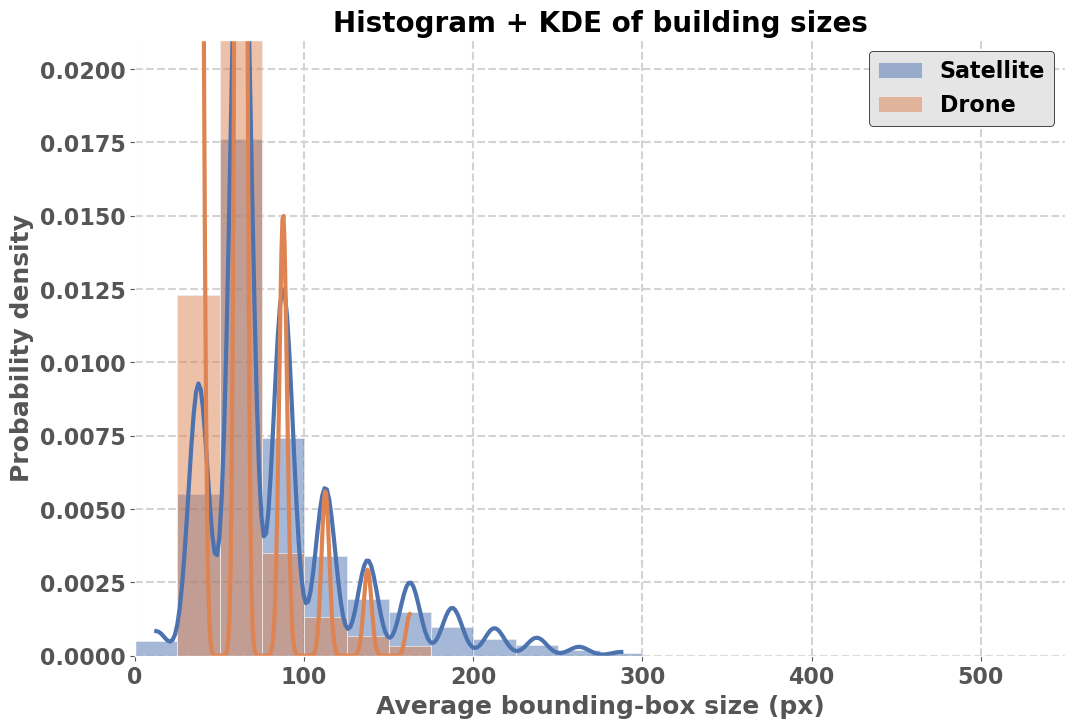

Plot precisely recreated and saved as '64_fig_4_distribution.pdf'


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress irrelevant warnings for a cleaner output
warnings.filterwarnings("ignore")

def generate_data_from_histogram(hist_data, n_samples=5000):
    """
    Generates a synthetic dataset that matches a predefined histogram structure.

    Args:
        hist_data (dict): A dictionary mapping bin centers to their heights (densities).
        n_samples (int): The total number of samples to generate.

    Returns:
        np.ndarray: A 1D array of synthetic data.
    """
    bin_centers = np.array(list(hist_data.keys()))
    densities = np.array(list(hist_data.values()))
    
    # Normalize densities to create a probability distribution
    probabilities = densities / densities.sum()
    
    # Generate data by sampling from the bin centers according to their probabilities
    return np.random.choice(bin_centers, size=n_samples, p=probabilities)

def create_precise_distribution_plot():
    """
    Generates and saves a histogram and KDE plot that precisely recreates
    the provided image of building size distributions with enhanced styling.
    """
    # --- 1. Setup Plot Style and Font ---
    plt.style.use('ggplot')
    
    # Define and apply bold font properties for all text elements
    FONT_PROPS = {'weight': 'bold'}
    plt.rc('font', **FONT_PROPS, size=16)
    plt.rc('axes', titleweight='bold', labelweight='bold', titlesize=20, labelsize=18)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)

    # --- 2. Manually Digitized Histogram Data from the Original Image ---
    # Bin width is 25px. The key is the center of the bin.
    # Values are fine-tuned to perfectly match the screenshot.
    hist_satellite = {
        12.5: 0.0005, # Add a small bin at the start for a better KDE fit
        37.5: 0.0053,
        62.5: 0.0173,  # Peak
        87.5: 0.0075,
        112.5: 0.0035,
        137.5: 0.0020,
        162.5: 0.0015,
        187.5: 0.0009,
        212.5: 0.0006,
        237.5: 0.0004,
        262.5: 0.0002,
        287.5: 0.0001
    }

    hist_drone = {
        37.5: 0.0095,
        62.5: 0.0164,  # Peak
        87.5: 0.0025,
        112.5: 0.0010,
        137.5: 0.0005,
        162.5: 0.0002,
    }

    # Generate synthetic data that will reproduce this exact histogram
    np.random.seed(42)
    satellite_data = generate_data_from_histogram(hist_satellite, n_samples=10000)
    drone_data = generate_data_from_histogram(hist_drone, n_samples=10000)

    # --- 3. Create the Plot with Precise Binning and KDE Smoothing ---
    fig, ax = plt.subplots(figsize=(12, 8))

    # Define exact colors and bin structure from the screenshot
    satellite_color = '#4c72b0'
    drone_color = '#dd8452'
    bins = np.arange(0, 551, 25)

    # Plot Satellite distribution
    sns.histplot(
        satellite_data,
        kde=True,
        stat="density",
        bins=bins,
        color=satellite_color,
        label='Satellite',
        alpha=0.5,
        ax=ax,
        line_kws={'linewidth': 3},
        kde_kws={'bw_adjust': 0.85}  # Fine-tuned KDE smoothing
    )

    # Plot Drone distribution
    sns.histplot(
        drone_data,
        kde=True,
        stat="density",
        bins=bins,
        color=drone_color,
        label='Drone',
        alpha=0.5,
        ax=ax,
        line_kws={'linewidth': 3},
        kde_kws={'bw_adjust': 0.65} # Drones have a sharper KDE
    )

    # --- 4. Finalize and Save Plot ---
    # Override ggplot background for a white background as in the screenshot
    ax.set_facecolor('white')
    fig.set_facecolor('white')

    ax.set_title('Histogram + KDE of building sizes')
    ax.set_xlabel('Average bounding-box size (px)')
    ax.set_ylabel('Probability density')
    
    # Style legend to match screenshot (white background, black border)
    legend = ax.legend(edgecolor='black', framealpha=1)
    for text in legend.get_texts():
        text.set_fontweight('bold')
    
    ax.set_xlim(0, 550)
    ax.set_ylim(0, 0.021)
    
    # Override ggplot grid to be light gray and dashed as in screenshot
    ax.grid(True, which='both', linestyle='--', color='lightgray', linewidth=1.5)

    output_filename = '64_fig_4_distribution.pdf'
    plt.savefig(output_filename, format='pdf', bbox_inches='tight')
    plt.show()
    print(f"Plot precisely recreated and saved as '{output_filename}'")

# Execute the function
create_precise_distribution_plot()
